## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score 

## Customer Segmentation/Clustering

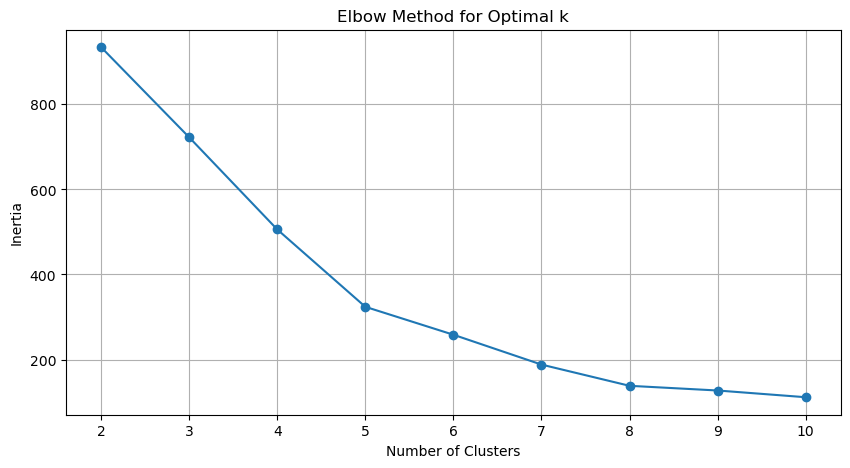

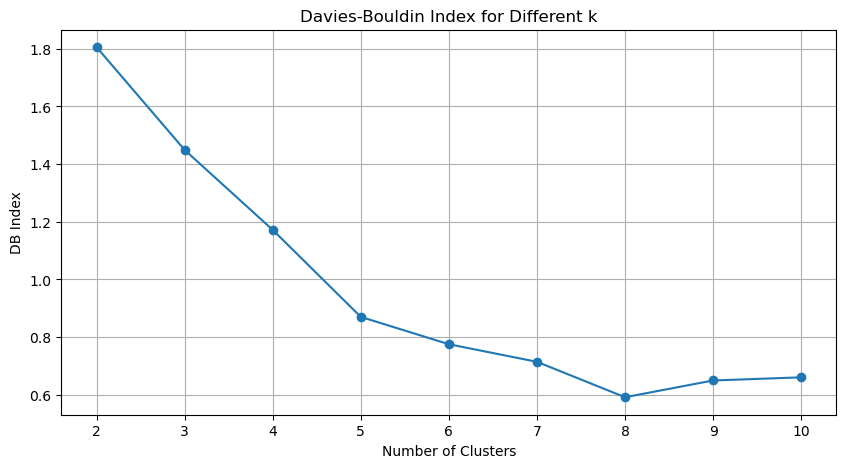

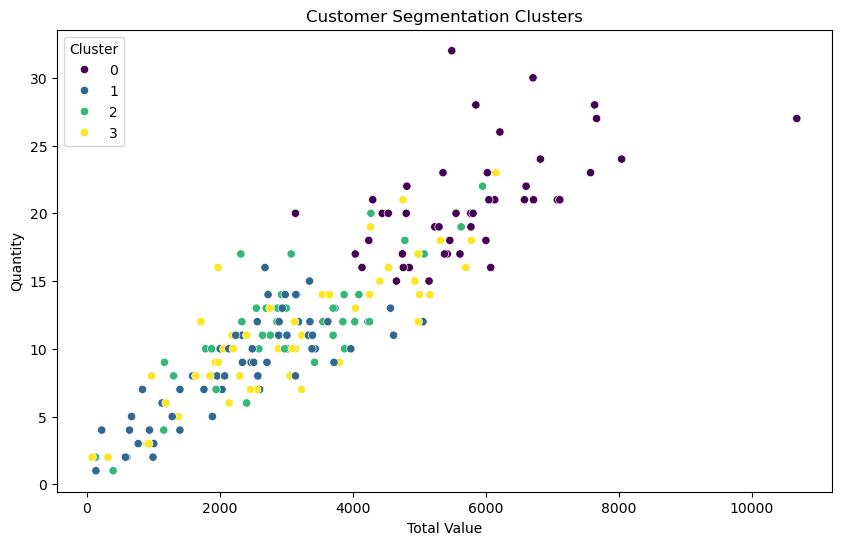

Number of clusters formed: 4
Davies-Bouldin Index: 1.1715584997331832


In [5]:
# Load datasets
customers = pd.read_csv(r"C:\Users\Rakshith\Downloads\Customers.csv")
transactions = pd.read_csv(r"C:\Users\Rakshith\Downloads\Transactions.csv")

# Merge datasets
merged_data = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index().merge(customers, on='CustomerID')

# Select relevant features for clustering
features = merged_data[['TotalValue', 'Quantity', 'Region']]  # Include Region if needed
features = pd.get_dummies(features, columns=['Region'])

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters (2 to 10)
inertia = []
db_index = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    db_index.append(davies_bouldin_score(scaled_features, kmeans.labels_))

# Plot the elbow method
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Plot DB Index
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), db_index, marker='o')
plt.title('Davies-Bouldin Index for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.grid()
plt.show()

# Fit KMeans with chosen number of clusters (e.g., 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='TotalValue', y='Quantity', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()

# Save clustering results
merged_data.to_csv('ClusteringResults.csv', index=False)

# Print clustering metrics
print(f'Number of clusters formed: {optimal_k}')
print(f'Davies-Bouldin Index: {db_index[optimal_k - 2]}')
import warnings
warnings.filterwarnings('ignore')